# Fine-tuning with Titan on Bedrock

### Information

<div class="alert alert-block alert-success">

<div class="alert alert-block alert-warning">

<div class="alert alert-block alert-danger">


  
**Data:**
    
Data Source - https://huggingface.co/datasets/ignmilton/ign_clean_instruct_dataset_500k
        
        Data Type - A large scale SFT dataset which is synthetically created from a subset of Ultrachat prompts.
        Dataset Example Entry -
    
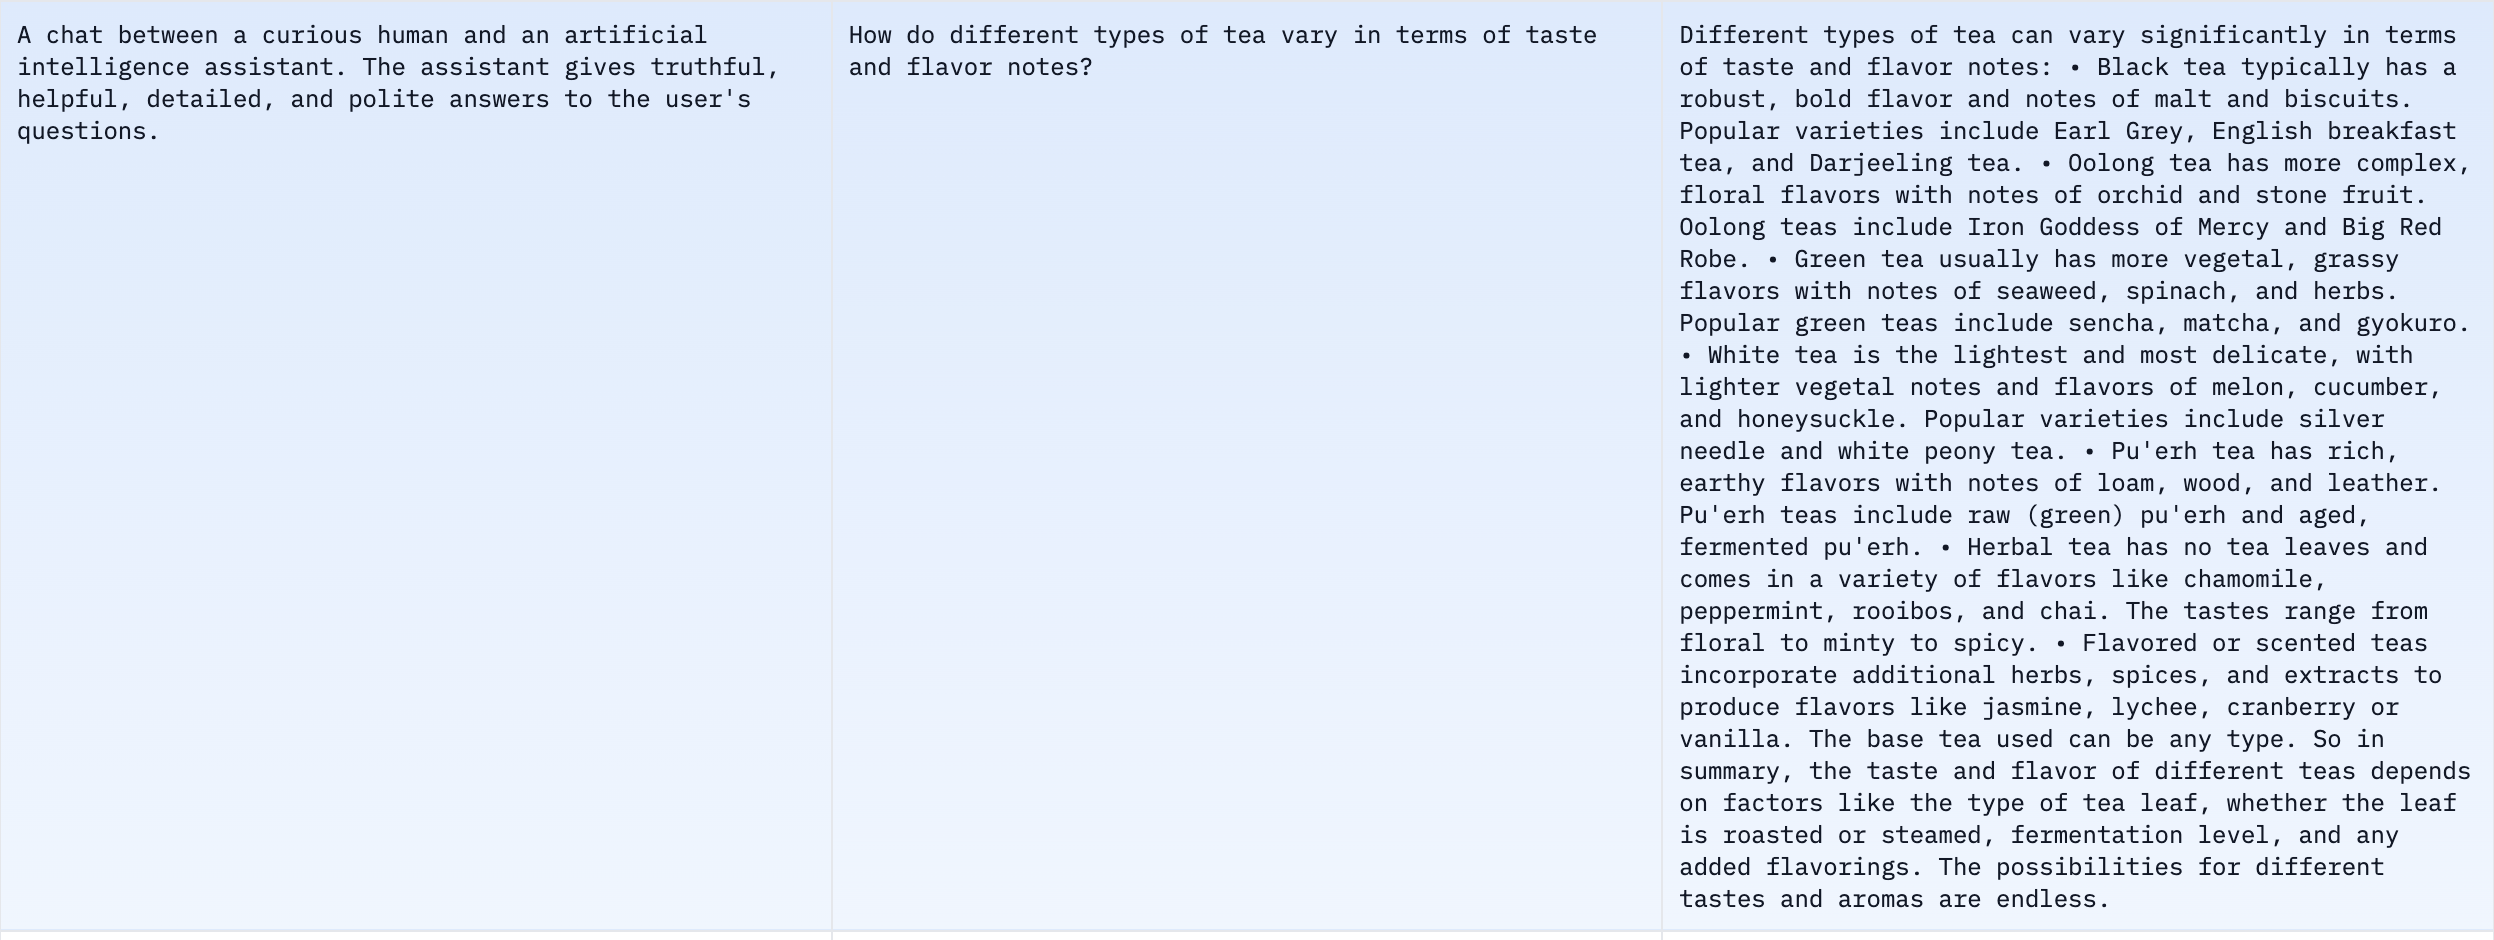

**Data Preparation:**
    
        Bedrock Fine-tuning Input Data Format Required:



    The dataset with 500k entries was prepared and split into test sets with the first 9999, 500, and 100 entries respectively. In each case, the modified data is saved in the format described above for fine-tuning on Amazon Bedrock. They are saved as separate test sets in an input s3 bucket. 
    
**Titan and Fine-tuned Models:**

    Kindly go through the latest documentation on fine-tuning available here: https://docs.aws.amazon.com/bedrock/latest/userguide/custom-models.html for more information and learning.

**Model0:**

Model 0 is the base model Titan Text G1 - Express*

**Model1:**

    Model 1 is the fine-tuned version of Titan Text G1 - Express over 9999 entries from the ign_clean_instruct_dataset_500k (otherwise named clean-instruct-000-pt as provisioned on AWS as a customized, provisioned model)*

    - Time to train - 7 hours
    - Learning Rate - 5.0E-6
    - Learning Rate Warmup Steps - 0
    - Batch Size - 1
    - Epochs - 5


**Model2:**

    Model 2 is the fine-tuned version of Titan Text G1 - Express over 1000 entries from the ign_clean_instruct_dataset_500k (otherwise named clean-instruct-001-pt as provisioned on AWS as a customized, provisioned model)*

    - Time to train - 1 hours
    - Learning Rate - 5.0E-5
    - Learning Rate Warmup Steps - 0
    - Batch Size - 1
    - Epochs - 10


**Additional Guidance:**

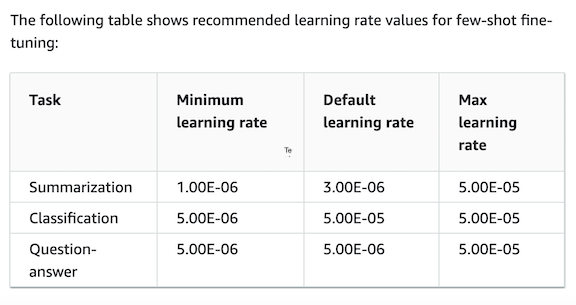

    You will find other guidelines on fine-tuning here: https://docs.aws.amazon.com/bedrock/latest/userguide/model-customization-guidelines.html

<div class="alert alert-block alert-danger">

<div class="alert alert-block alert-warning">

<div class="alert alert-block alert-success">

### Model Initialization

In [1]:
import boto3

bedrock_api = boto3.client(
    service_name='bedrock',
    region_name= 'us-west-2',
    endpoint_url= 'https://bedrock.{epregion}.amazonaws.com'.format(epregion = 'us-west-2'))

In [2]:
bedrock_api.list_provisioned_model_throughputs()

{'ResponseMetadata': {'RequestId': '54b70f81-674f-4441-9e4f-3a9eae7b7fb0',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Tue, 10 Oct 2023 18:07:04 GMT',
   'content-type': 'application/json',
   'content-length': '1406',
   'connection': 'keep-alive',
   'x-amzn-requestid': '54b70f81-674f-4441-9e4f-3a9eae7b7fb0'},
  'RetryAttempts': 0},
 'provisionedModelSummaries': [{'provisionedModelName': 'clean-instruct-001-pt',
   'provisionedModelArn': 'arn:aws:bedrock:us-west-2:526941417713:provisioned-model/rm5tbjpk1ehm',
   'modelArn': 'arn:aws:bedrock:us-west-2:526941417713:custom-model/amazon.titan-text-express-v1:0:8k/nfjxbj9l1qge',
   'desiredModelArn': 'arn:aws:bedrock:us-west-2:526941417713:custom-model/amazon.titan-text-express-v1:0:8k/nfjxbj9l1qge',
   'foundationModelArn': 'arn:aws:bedrock:us-west-2::foundation-model/amazon.titan-text-express-v1:0:8k',
   'modelUnits': 1,
   'desiredModelUnits': 1,
   'status': 'InService',
   'creationTime': datetime.datetime(2023, 10, 9, 12, 4

### Amazon Titan - Model0

In [3]:
import boto3

bedrock = boto3.client(service_name='bedrock')

In [4]:
bedrock.get_foundation_model(modelIdentifier='amazon.titan-text-express-v1')

{'ResponseMetadata': {'RequestId': '5b7345dc-c063-4cc3-9d42-b3fe456dfa38',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Tue, 10 Oct 2023 18:07:08 GMT',
   'content-type': 'application/json',
   'content-length': '365',
   'connection': 'keep-alive',
   'x-amzn-requestid': '5b7345dc-c063-4cc3-9d42-b3fe456dfa38'},
  'RetryAttempts': 0},
 'modelDetails': {'modelArn': 'arn:aws:bedrock:us-west-2::foundation-model/amazon.titan-text-express-v1',
  'modelId': 'amazon.titan-text-express-v1',
  'modelName': 'Titan Text G1 - Express',
  'providerName': 'Amazon',
  'inputModalities': ['TEXT'],
  'outputModalities': ['TEXT'],
  'responseStreamingSupported': True,
  'customizationsSupported': [],
  'inferenceTypesSupported': ['ON_DEMAND']}}

In [5]:
import boto3
import json

bedrock = boto3.client(service_name='bedrock-runtime')

In [6]:
def prompt0(prompt_data, temperature = 0.0, topP = 1.0, maxTokenCount = 2000):
    
    body = json.dumps({"inputText": prompt_data,
                       "textGenerationConfig": {"temperature":temperature,
                                                "topP":topP,
                                                "maxTokenCount":maxTokenCount}})
    
    modelId = 'amazon.titan-text-express-v1'
    accept = 'application/json'
    contentType = 'application/json'

    response = bedrock.invoke_model(body=body,
                                    modelId=modelId,
                                    accept=accept,
                                    contentType=contentType)

    response_body = json.loads(response.get('body').read())
    return response_body.get('results')[0].get('outputText')

In [76]:
prompt_data = """Can mindful walking be used as a form of meditation or spiritual practice?"""

print(prompt0(prompt_data, temperature=0.0, topP=0.1, maxTokenCount=2000))


"Walking meditation" is a form of alternative meditation. With this meditation style, the present-moment awareness of traditional meditation methods can still exist. In addition, walking meditation allows the individual to feel more present during routine activities. So, the answer is yes, mindful walking can be used as a form of meditation or spiritual practice.


### Custom Models (Provisioned) - Model1 and Model2

In [7]:
model1 = bedrock_api.list_provisioned_model_throughputs()['provisionedModelSummaries'][1]['provisionedModelArn']

model1 ### Custom Model (PT): clean-instruct-000-pt

'arn:aws:bedrock:us-west-2:526941417713:provisioned-model/b5obptjw1qbn'

In [8]:
model2 = bedrock_api.list_provisioned_model_throughputs()['provisionedModelSummaries'][0]['provisionedModelArn']

model2 ### Cusom Model (PT): clean-instruct-001-pt

'arn:aws:bedrock:us-west-2:526941417713:provisioned-model/rm5tbjpk1ehm'

In [9]:
def prompt1(prompt_data, temperature = 0.0, topP = 1.0, maxTokenCount = 2000):
    
    body = json.dumps({"inputText": prompt_data,
                       "textGenerationConfig": {"temperature":temperature,
                                                "topP":topP,
                                                "maxTokenCount":maxTokenCount}})
    
    modelId = model1
    accept = 'application/json'
    contentType = 'application/json'

    response = bedrock.invoke_model(body=body,
                                    modelId=modelId,
                                    accept=accept,
                                    contentType=contentType)

    response_body = json.loads(response.get('body').read())
    return response_body.get('results')[0].get('outputText')

In [80]:
prompt_data = """Can mindful walking be used as a form of meditation or spiritual practice?"""

print(prompt1(prompt_data, temperature=0.0, topP=0.1, maxTokenCount=2000))

Yes, mindful walking can be an excellent form of meditation and spiritual practice. Some of the benefits of mindful walking include:

• It helps you slow down and be fully present in the moment. Focusing on the sensations of walking, such as the contact of your feet with the ground, helps shift your mind from distracted thinking to conscious awareness.

• It enhances your sensory experience. When you walk mindfully, you open yourself up to fully experiencing the sights, sounds, smells, and textures around you. This helps reduce stress and increases feelings of well-being.

• It provides an opportunity for insight. A quiet, observant mind during mindful walking can lead to new perspectives and understandings about yourself and your life. Solutions to problems may arise spontaneously. 

• It leads to a sense of interconnection. By slowing down and observing the world around you with presence, you can develop a deeper appreciation for your connection with all things. This can feel profoun

In [10]:
def prompt2(prompt_data, temperature = 0.0, topP = 1.0, maxTokenCount = 2000):
    
    body = json.dumps({"inputText": prompt_data,
                       "textGenerationConfig": {"temperature":temperature,
                                                "topP":topP,
                                                "maxTokenCount":maxTokenCount}})
    
    modelId = model2
    accept = 'application/json'
    contentType = 'application/json'

    response = bedrock.invoke_model(body=body,
                                    modelId=modelId,
                                    accept=accept,
                                    contentType=contentType)

    response_body = json.loads(response.get('body').read())
    return response_body.get('results')[0].get('outputText')

In [82]:
prompt_data = """Can mindful walking be used as a form of meditation or spiritual practice?"""

print(prompt2(prompt_data, temperature=0.0, topP=0.1, maxTokenCount=2000))

Yes, mindful walking can be an excellent form of meditation and spiritual practice. Some of the benefits of mindful walking include:

• It helps you slow down and be fully present in the moment. Focusing on the sensations of walking, such as the contact of your feet with the ground, helps shift your mind from distracted thinking to conscious awareness.

• It enhances your sensory experience. When you walk mindfully, you open yourself up to fully experiencing the sights, sounds, smells, and textures around you. This helps reduce stress and increases feelings of well-being.

• It provides an opportunity for insight. A quiet, observant mind during mindful walking can lead to new perspectives and understandings about yourself and your life. Solutions to problems may arise spontaneously. 

• It leads to a sense of interconnection. By slowing down and observing the world around you with presence, you can develop a deeper appreciation for your connection with all things. This can feel profoun

<div class="alert alert-block alert-info">

    Sample Test - The Output from both fine-tuned models (set at the same state by equal inference parameters) is the same. The ROUGE and BLEU scores can be tested by validating the output with the original source output for the question from the dataset. 

    The original output to the input prompt *"Can mindful walking be used as a form of meditation or spiritual practice?"* from the dataset is as shown below:

    Yes, mindful walking can be an excellent form of meditation and spiritual practice. Some of the benefits of mindful walking include:\n\n\u2022 It helps you slow down and be fully present in the moment. Focusing on the sensations of walking, such as the contact of your feet with the ground, helps shift your mind from distracted thinking to conscious awareness.\n\n\u2022 It enhances your sensory experience. When you walk mindfully, you open yourself up to fully experiencing the sights, sounds, smells, and textures around you. This helps reduce stress and increases feelings of well-being.\n\n\u2022 It provides an opportunity for insight. A quiet, observant mind during mindful walking can lead to new perspectives and understandings about yourself and your life. Solutions to problems may arise spontaneously. \n\n\u2022 It leads to a sense of interconnection. By slowing down and observing the world around you with presence, you can develop a deeper appreciation for your connection with all things. This can feel profoundly meaningful.\n\n\u2022 It boosts physical health and movement. In addition to the mental and spiritual benefits, mindful walking provides gentle exercise. When done regularly, it can lead to improved stamina and flexibility.\n\nTo practice mindful walking, find a place that allows you to walk slowly without distraction or interruption. As you walk, focus your awareness on the sensations in your feet and legs, and the movements of your body. Take in the sights and sounds around you, but avoid analyzing or judging what you perceive. Start with 10-15 minutes at a time, 2-3 times per week. With regular practice, mindful walking can become a very nourishing ritual.

#### Model1 Vs Model2

In [95]:
test_hypothesis = "Yes, mindful walking can be an excellent form of meditation and spiritual practice. Some of the benefits of mindful walking include: It helps you slow down and be fully present in the moment. Focusing on the sensations of walking, such as the contact of your feet with the ground, helps shift your mind from distracted thinking to conscious awareness. It enhances your sensory experience. When you walk mindfully, you open yourself up to fully experiencing the sights, sounds, smells, and textures around you. This helps reduce stress and increases feelings of well-being. It provides an opportunity for insight. A quiet, observant mind during mindful walking can lead to new perspectives and understandings about yourself and your life. Solutions to problems may arise spontaneously. It leads to a sense of interconnection. By slowing down and observing the world around you with presence, you can develop a deeper appreciation for your connection with all things. This can feel profoundly meaningful. It boosts physical health and movement. In addition to the mental and spiritual benefits, mindful walking provides gentle exercise. When done regularly, it can lead to improved stamina and flexibility. \To practice mindful walking, find a place that allows you to walk slowly without distraction or interruption. As you walk, focus your awareness on the sensations in your feet and legs, and the movements of your body. Take in the sights and sounds around you, but avoid analyzing or judging what you perceive. Start with 10-15 minutes at a time, 2-3 times per week. With regular practice, mindful walking can become a very nourishing ritual."

test_reference = "Yes, mindful walking can be an excellent form of meditation and spiritual practice. Some of the benefits of mindful walking include:\n\n\u2022 It helps you slow down and be fully present in the moment. Focusing on the sensations of walking, such as the contact of your feet with the ground, helps shift your mind from distracted thinking to conscious awareness.\n\n\u2022 It enhances your sensory experience. When you walk mindfully, you open yourself up to fully experiencing the sights, sounds, smells, and textures around you. This helps reduce stress and increases feelings of well-being.\n\n\u2022 It provides an opportunity for insight. A quiet, observant mind during mindful walking can lead to new perspectives and understandings about yourself and your life. Solutions to problems may arise spontaneously. \n\n\u2022 It leads to a sense of interconnection. By slowing down and observing the world around you with presence, you can develop a deeper appreciation for your connection with all things. This can feel profoundly meaningful.\n\n\u2022 It boosts physical health and movement. In addition to the mental and spiritual benefits, mindful walking provides gentle exercise. When done regularly, it can lead to improved stamina and flexibility.\n\nTo practice mindful walking, find a place that allows you to walk slowly without distraction or interruption. As you walk, focus your awareness on the sensations in your feet and legs, and the movements of your body. Take in the sights and sounds around you, but avoid analyzing or judging what you perceive. Start with 10-15 minutes at a time, 2-3 times per week. With regular practice, mindful walking can become a very nourishing ritual."

In [92]:
!pip install rouge

!pip install bleu

  Preparing metadata (setup.py) ... done
  Obtaining dependency information for efficiency from https://files.pythonhosted.org/packages/e8/c5/929f7b09c51fe455e0fd04652f476f3d2ef27ca74c2103386840bb2ed0ca/efficiency-1.31-py3-none-any.whl.metadata
  Created wheel for bleu: filename=bleu-0.3-py3-none-any.whl size=5781 sha256=457bac8ddf12e395f20fd7ec5c29de7c605c3da5ea8d606a53cda40d54620e7e
  Stored in directory: /home/ec2-user/.cache/pip/wheels/c6/d8/d1/009abe01b8b2c6a14c62d197b510b3cc1076014c22d712c5ce
Successfully built bleu


In [98]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 5.4 MB/s eta 0:00:00
  Obtaining dependency information for portalocker from https://files.pythonhosted.org/packages/17/9e/87671efcca80ba6203811540ed1f9c0462c1609d2281d7b7f53cef05da3d/portalocker-2.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for regex from https://files.pythonhosted.org/packages/8f/3e/4b8b40eb3c80aeaf360f0361d956d129bb3d23b2a3ecbe3a04a8f3bdd6d3/regex-2023.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 8.0 MB/s eta 0:00:00
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/01/ae/ce23856fb6065f254101c1df381050b13adf26088dd554a15776615d470f/lxml-4.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 66.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773

In [9]:
import rouge
from sacrebleu.metrics import BLEU

In [96]:
from rouge import Rouge
rouge_scorer = Rouge()

hypothesis = test_hypothesis
reference = test_reference

score = rouge_scorer.get_scores(
    hyps=hypothesis,
    refs=reference,
)
score[0]["rouge-l"]["f"]

0.9907120693034535

In [109]:
from sacrebleu.metrics import BLEU
bleu_scorer = BLEU(effective_order=True)

hypothesis = test_hypothesis
reference = test_reference

score = bleu_scorer.sentence_score(
    hypothesis=hypothesis,
    references=[reference],
)

score.score/100 # sacreBLEU gives the score in percent

0.9542681668738133

In [110]:
Bleu = 0.9542681668738133
Rouge = 0.9907120693034535

F1 = 2 * (Bleu * Rouge) / (Bleu + Rouge) ## bleu score is precision-focused and ROUGE score focuses on recall

F1 ## An F-score is the harmonic mean of a system's precision and recall values. 

0.9721486858212003

<div class="alert alert-block alert-info">

    One main disadvantage of using metrics such as BLEU or ROUGE is the fact that the performance of text generation models are dependent on exact matches. Exact matches might be important for use-cases like machine translation, however for generative AI models that try to create meaningful and similar texts to corpus data, exact matches might not be very accurate.

    Hence, instead of exact matches, BERTScore is focused on the similarity between reference and generated text by using contextual embeddings. The main idea behind contextual embeddings is to understand the meaning behind the reference and candidate text respectively and then compare those meanings.

    REF: https://arize.com/blog-course/generative-ai-metrics-bleu-score/#:~:text=While%20the%20main%20difference%20between,human%20judgment%20at%20the%20sentence
    
    **TL;DR BERTScore leverages the pre-trained contextual embeddings from BERT and matches words in candidate and reference sentences by cosine similarity. It has been shown to correlate with human judgment on sentence-level and system-level evaluation. Moreover, BERTScore computes precision, recall, and F1 measure, which can be useful for evaluating different language generation tasks.**

In [113]:
!pip install bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.5 MB/s eta 0:00:00
  Obtaining dependency information for transformers>=3.0.0 from https://files.pythonhosted.org/packages/1a/d1/3bba59606141ae808017f6fde91453882f931957f125009417b87a281067/transformers-4.34.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 12.0 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.16.4 from https://files.pythonhosted.org/packages/ef/b5/b6107bd65fa4c96fdf00e4733e2fe5729bb9e5e09997f63074bb43d3ab28/huggingface_hub-0.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.15,>=0.14 from https://files.pythonhosted.org/packages/a7/7b/c1f643eb086b6c5c33eef0c3752e37624bd23e4cbc9f1332748f1c6252d1/tokenizers-0.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/20/4e/878b080dbda92666233ec6f3

In [115]:
import torch
from bert_score import score


# reference and generated texts
ref_text = test_reference
gen_text = test_hypothesis

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.9845 R=0.9782 F1=0.9813


#### Model1/Model2 Vs Titan

In [116]:
test_hypothesis_titan = "To practice mindful walking, find a place that allows you to walk slowly without distraction or interruption. As you walk, focus your awareness on the sensations in your feet and legs, and the movements of your body. Take in the sights and sounds around you, but avoid analyzing or judging what you perceive. Start with 10-15 minutes at a time, 2-3 times per week. With regular practice, mindful walking can become a very nourishing ritual."

In [118]:
hypothesis = test_hypothesis_titan
reference = test_reference

score = rouge_scorer.get_scores(
    hyps=hypothesis,
    refs=reference,
)
score[0]["rouge-l"]["f"]

0.553571424567921

In [119]:
hypothesis = test_hypothesis_titan
reference = test_reference

score = bleu_scorer.sentence_score(
    hypothesis=hypothesis,
    references=[reference],
)

score.score/100 # sacreBLEU gives the score in percent

0.08677432947392927

In [120]:
Bleu = 0.08677432947392927
Rouge = 0.553571424567921

F1 = 2 * (Bleu * Rouge) / (Bleu + Rouge) ## bleu score is precision-focused and ROUGE score focuses on recall

F1 ## An F-score is the harmonic mean of a system's precision and recall values. 

0.15003078845954135

In [117]:
ref_text = test_reference
gen_text = test_hypothesis_titan

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.9166 R=0.6586 F1=0.7665


<div class="alert alert-block alert-warning">
    
    In the sample test above, we compared the outputs from both models (which turned out to be the same after fine-tuning 9999 training entries for model1 and 100 training entries for model2) with the original output from the dataset; we also compared the base Titan model's response output with the output from the original dataset. In the following examples, we will only be comparing both fine-tuned models for various case. 
    
    [1] In case 1, we will change the inference parameters on both models equally for a different sample (input - output) test from the original dataset and test their outputs as we did above. We will test other scenarios and play around with sample inputs/outputs occasionally comparing the outputs with the base Titan model.
    
    [2] In case 2, we will use the entry point that exceeds the 100th mark in the dataset; in other words, since model2 was trained or fine-tuned with the first 100 entries from the dataset, its output MUST be different from the output generated by model1 that was fine-tuned with the first 9999 entries.

### Case 1

Validation Sample Test Inputs and Outputs from the Original Dataset 

- Ps are prompts, Rs are test references and in each case we will be naming model generated outputs as H1-1 (meaning hypothesis 1 from model1), H1-2 (meaning hypothesis 1 from model2)

- Bear in mind that BERT is a more valuable evaluation metric in context than BLEU or ROUGE simply because it compares the semantic meanings rather than exact word retrievals

In [11]:
# within the first 100 entries

P1 = "What are some common mistakes made by businesses when it comes to marketing?"
P2 = "How do rivers impact the global water cycle and weather patterns?"
P3 = "How do these music streaming services differ from traditional music broadcasting methods?"

# beyond the first 100 entries (excludes training done on model2)

P4 = "How did the Renaissance impact art, literature, and culture of the time period?"
P5 = "How can mentoring programs help in improving employee retention rates?"
P6 = "What impact did the Roman Empire have on international trade and commerce during its time?"

# beyond the first 9999 entries (excludes both fine-tuned models)

P7 = "How do high altitude winds impact the development of cloud formations and their associated weather systems?"

In [12]:
# corresponding reference texts

R1 = "Here are some common mistakes businesses make when it comes to marketing:\n\n\u2022 Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.\n\n\u2022 Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.\n\n\u2022 Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth.\n\n\u2022 Not data-driven: Many marketing campaigns are built on assumptions rather than actually analyzing customer data and insights. Lack of testing and optimization based on data.  \n\n\u2022 Lack of unique selling proposition: The business is unable to differentiate itself from competitors and lacks a clear unique positioning in the market.\n\n\u2022 Ignoring online marketing: Still focusing mostly on traditional marketing like print ads, billboards, etc. and ignoring the importance of online marketing channels like social media, content marketing, SEO, etc.\n\n\u2022 Lack of long-term vision: Focusing too much on short-term campaigns rather than having a long-term marketing and branding vision. Lack of consistency over the long run.\n\n\u2022 Not getting customer feedback: Not actively seeking feedback from customers and analyzing it to improve the marketing campaigns over time. Lack of flexibility to change based on feedback.\n\n\u2022 Poor employee engagement: Employees are not actively engaged in the marketing efforts and do not understand or share the brand message. Lack of internal marketing.  \n\n\u2022 Trying to do everything in-house: Not leveraging external marketing expertise and resources when needed. Lack of partnership opportunities. Trying to control everything internally."
R2 = "Rivers have a significant impact on the global water cycle and weather patterns:\n\n1. They transport water from land to oceans. Rivers collect water from precipitation, snowmelt and runoff and transport it from land to the oceans and seas. This maintains the balance of water between land and oceans. Without rivers, much of the water on land would stagnate or evaporate, making many parts of land very dry.\n\n2. They influence regional precipitation patterns. The water vapor from rivers enters the atmosphere through evaporation and plant transpiration. As the air rises and cools, the water vapor condenses into rain or snow, which falls onto the surrounding land. This can create precipitation patterns that mirror river networks. The rain shadows created by rivers can also lead to dry regions.\n\n3. They affect ocean processes which drive global circulation. The fresh water, sediments and nutrients flowing into the oceans from rivers influences ocean temperatures, salinity levels and circulation patterns. Changes in ocean circulation can impact climate patterns across the whole planet through complex interactions across the hydrosphere.\n\n4. They shape landscapes and habitats. The erosion and deposition of sediment by rivers create river valleys, floodplains, deltas and estuaries - diverse landscapes and ecosystems that are home to many plants and animals. These riparian and aquatic habitats directly depend on rivers and streams.\n\n5. They moderate temperatures. Flowing rivers transport heat and cold, influencing the local climate around them. They help moderate air temperature in summer and winter, keeping nearby areas cooler in summer and warmer in winter. This 'temperature buffering' effect is more pronounced for wider, more slowly flowing rivers.\n\nSo in many interconnected ways, rivers drive regional and global water and energy cycles that shape climate patterns across the Earth's surface. They connect the continents and oceans, transporting water, heat, sediments and nutrients around the planet."
R3 = "Music streaming services differ from traditional music broadcasting in several key ways:\n\n\u2022 On-demand access. Streaming services allow you to listen to any song or album on-demand, whenever you want. Traditional radio only plays what the station chooses at a particular time.\n\n\u2022 Personalized experience. Streaming services use algorithms to tailor the music experience to your personal tastes. They provide customized playlists, radios, and recommendations based on your listening history. Traditional radio plays the same content for all listeners.\n\n\u2022 Wider variety. Streaming services offer a catalog of tens of millions of songs, covering virtually every genre. Traditional radio typically plays what is most popular and mainstream.\n\n\u2022 Ad-free options. Some streaming services offer paid, commercial-free experiences. Traditional radio is generally ad-supported.\n\n\u2022 Offline listening. Many streaming services allow you to download music and playlists to listen offline, without an Internet connection. Traditional radio required a live signal. \n\n\u2022 Interactive features. Streaming services provide interactive features like building your own playlists, sharing music with friends, reading lyrics, seeing concert dates, and more. Traditional radio offers little interactivity.\n\n\u2022 High audio quality. Some streaming services stream music in high definition, with lossless audio formats. FM radio, in particular, is low quality. \n\n\u2022 Global reach. Major streaming services are available virtually everywhere. Traditional radio stations have limited geographical reach.\n\nSo in summary, the key differences revolve around control, personalization, variety, premium features, interactivity, and quality. Of course, traditional broadcast radio still has its benefits, like the human curation and local flavor of DJs. But streaming represents the modern way most people now consume on-demand music."
R4 = "The Renaissance had a huge impact on art, literature, and culture in Europe:\n\n\u2022 Art: The Renaissance saw a flourishing of new artistic techniques and styles. There were major advances in realistic painting techniques, including linear perspective, foreshortening, and oil painting. Key Renaissance artists include Leonardo da Vinci, Michelangelo, Raphael, Titian, etc. They produced some of the most famous artworks of all time, like the Mona Lisa, Last Supper, Creation of Adam, etc.\n\n\u2022 Literature: The Renaissance saw a boom in literature, especially the sonnet. Key figures like Dante, Petrarch, and Boccaccio helped establish the Italian Renaissance literature. The period also saw the rise of humanist philosophy and the publication of influential works like The Prince, Utopia, and essays by Montaigne. Vernacular literature also rose in prominence, with works in Italian, English, French, etc. instead of just Latin. \n\n\u2022 Culture: The Renaissance was marked by a flourishing of new philosophical and intellectual movements. There was a rise of humanism, with a focus on human agency and achievement. Advancements in science led to the Scientific Revolution. The rediscovery of ancient Greek and Roman texts resulted in a revival of interest in mathematics, physics, astronomy, et. The period also saw the beginnings of the Protestant Reformation in Europe. Politically, there were changes like the decline of feudalism and growth of new monarchies and city-states.\n\nIn summary, the Renaissance transformed European culture from the medieval period by ushering in revolutionary developments in art, science, religion, politics, and philosophy. It led to some enduring cultural legacies that shaped civilization."
R5 = "Mentoring programs can help improve employee retention in several ways:\n\n1. They help new employees onboard and adjust to the organization culture. Having a mentor can help a new employee understand the cultural norms, values and unwritten rules of an organization. This can help them feel integrated into the company faster and improve their sense of belonging.\n\n2. They provide career guidance and support. Mentors can help mentees navigate their career paths, set career goals and work on skills development. This career support is highly valued by employees and can strengthen their attachment to the organization. \n\n3. They help reduce feelings of isolation. Mentoring connects employees and builds interpersonal relationships. This can help address feelings of isolation at work and create a support system for employees. Strong workplace relationships are a key driver of employee retention.\n\n4. They provide psychosocial support. Mentors can offer mentees support, empathy, counseling and advice to cope with challenges at work. This type of psychosocial support can help reduce stress, anxiety and burnout, which are major contributors to employee turnover.\n\n5. They create growth opportunities. Effective mentoring helps mentees learn, develop skills, and advance their careers. Growth opportunities are consistently ranked among the top reasons employees stay with an organization. Mentoring programs can be designed to help employees achieve targeted career growth.\n\n6. They increase employee satisfaction and engagement. Receiving career and psychosocial support from mentors leads to higher satisfaction and motivation. Mentees tend to feel more engaged with their work and committed to the organization. This boosts retention as satisfied and engaged employees are much less likely to leave their jobs.\n\nIn summary, mentoring programs have significant benefits for employee onboarding, wellbeing, growth, satisfaction and engagement. By addressing many of the common drivers of turnover, mentoring can be an effective employee retention strategy. With the support of mentors, employees develop stronger connections to the organization and the motivation to stay employed with the company."
R6 = "The Roman Empire had a huge impact on international trade and commerce:\n\n1. It established a large free trade zone within its borders. Trade flourished in the Mediterranean region and goods were transported efficiently between the provinces of the empire via an extensive road network and shipping routes. This allowed for the free flow of goods, capital, and labor across the empire.\n\n2. The Roman Empire introduced a single currency - the Roman coinage made trade easier across its vast territory. Traders did not have to worry about exchanging different local currencies.\n\n3. The empire invested heavily in infrastructure like roads, bridges, ports, and lighthouses that enabled trade over long distances. Some of these structures still exist today.\n\n4. Trade routes like the Silk Road connected the Roman Empire to India, Arabia, and China. The Romans were able to tap into existing trade routes in the east and facilitate the exchange of goods over long distances. Spices, silk, and precious stones were imported into the Roman Empire.\n\n5. Relative peace and security within the empire provided a safe environment for trade and commerce to flourish. Traders did not have to fear constant wars, invasions, or banditry that was common in other parts of the world.\n\n6. Major cities like Rome, Alexandria and Constantinople became important commercial as well as cultural centers. They attracted traders, craftsmen, and merchants from across the empire and beyond. New and vibrant commercial economies developed in these cities.\n\nSo in many ways, the Roman Empire established the basis for free trade, fostered commerce, invested in infrastructure, increased connectivity with the outside world, and promoted urbanization - all of which had a profound and lasting influence on international trade."
R7 = "High altitude winds, such as jet streams, have a significant impact on cloud formation and weather systems:\n\n1. They transport moisture and vorticity (spin) in the atmosphere. As the winds blow clouds and disturbance in the atmosphere, they transport moisture, heat, and vorticity which can influence the development of storm systems. The jet stream in particular, due to its high wind speeds, is very effective at transporting these atmospheric properties over long distances.\n\n2. They influence temperature gradients and instability. The winds can enhance temperature contrasts in the atmosphere, leading to instability and convection. This instability can trigger the formation of clouds and precipitation. The temperature contrasts set up by the jet stream, for example, often lead to storm development. \n\n3. They guide the movement of weather systems. The high altitude winds blow weather systems, such as low and high pressure systems, across the globe. So they essentially steer storms and determine their tracks. The path that extratropical cyclones travel is strongly influenced by the position and orientation of the jet stream.\n\n4. They can lead to cyclogenesis. Rapid changes in wind speed and direction with height, known as wind shear, can promote cyclogenesis - the development of cyclones. Cyclones that form and intensify rapidly are known as meteorological \"bombs\". The jet stream and other wind shears sometimes aid in spinning up these bomb cyclones.\n\n5. They enhance lifting and orographic effects. Where the winds blow perpendicular to mountain ranges, orographic lifting of the air can wring out precipitation. This is known as orographic precipitation. Enhanced lifting along weather fronts can also generate clouds and precipitation.\n\nSo in many ways, high altitude winds have a profound influence on cloud formation and the weather. By transporting atmospheric properties over long distances, guiding weather systems, creating instability and wind shear, and enhancing lifting, these winds play a crucial role in the development of clouds and storm systems in the atmosphere."

**TESTING**

#### **P1**

**P1 = "What are some common mistakes made by businesses when it comes to marketing?"**

In [21]:
## Titan Text Generation 1 (G1)

prompt_data = P1

print(prompt0(prompt_data, temperature=0.0, topP=0.1, maxTokenCount=2000))


1)Not having a clear target audience.
2)Not doing enough research to understand the target audience.
3)Focusing too much on self-promotion and not enough on building relationships with customers.
4)Not using data and analytics to guide marketing decisions.
5)Trying to appeal to everyone, which results in a generic and ineffective message.


In [22]:
# Model1

prompt_data = P1

H_model1 = print(prompt1(prompt_data, temperature=0.0, topP=0.1, maxTokenCount=2000))

H_model1

Here are some common mistakes businesses make when it comes to marketing:

• Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.

• Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.

• Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth.

• Not data-driven: Many marketing campaigns are built on assumptions rather than actually analyzing customer data and insights. Lack of testing and optimization based on data.  

• Lack of unique selling proposition: The business is unable to differentiate itself from competitors and lacks a clear unique positioning in the market.

• Ignoring online marketing: Still focusing mostly on traditional marketing like print ads,

In [23]:
# Model2

prompt_data = P1

H_model2 = print(prompt2(prompt_data, temperature=0.0, topP=0.1, maxTokenCount=2000))

H_model2

Here are some common mistakes businesses make when it comes to marketing:

• Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.

• Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.

• Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth.

• Not data-driven: Many marketing campaigns are built on assumptions rather than actually analyzing customer data and insights. Lack of testing and optimization based on data.  

• Lack of unique selling proposition: The business is unable to differentiate itself from competitors and lacks a clear unique positioning in the market.

• Ignoring online marketing: Still focusing mostly on traditional marketing like print ads,

In [24]:
print(H_model1 is H_model2)

True


In [31]:
H_model12 = H_model1 = H_model2 = """Here are some common mistakes businesses make when it comes to marketing:

• Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.

• Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.

• Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth.

• Not data-driven: Many marketing campaigns are built on assumptions rather than actually analyzing customer data and insights. Lack of testing and optimization based on data.  

• Lack of unique selling proposition: The business is unable to differentiate itself from competitors and lacks a clear unique positioning in the market.

• Ignoring online marketing: Still focusing mostly on traditional marketing like print ads, billboards, etc. and ignoring the importance of online marketing channels like social media, content marketing, SEO, etc.

• Lack of long-term vision: Focusing too much on short-term campaigns rather than having a long-term marketing and branding vision. Lack of consistency over the long run.

• Not getting customer feedback: Not actively seeking feedback from customers and analyzing it to improve the marketing campaigns over time. Lack of flexibility to change based on feedback.

• Poor employee engagement: Employees are not actively engaged in the marketing efforts and do not understand or share the brand message. Lack of internal marketing.  

• Trying to do everything in-house: Not leveraging external marketing expertise and resources when needed. Lack of partnership opportunities. Trying to control everything internally. """

In [32]:
import rouge
from rouge import Rouge
rouge_scorer = Rouge()

hypothesis = H_model12
reference = R1

score = rouge_scorer.get_scores(
    hyps=hypothesis,
    refs=reference,
)
score[0]["rouge-l"]["f"]

0.9967637490453598

In [34]:
from sacrebleu.metrics import BLEU
bleu_scorer = BLEU(effective_order=True)

hypothesis = H_model12
reference = R1

score = bleu_scorer.sentence_score(
    hypothesis=hypothesis,
    references=[reference],
)

score.score/100 # sacreBLEU gives the score in percent

1.0000000000000004

In [36]:
import torch
from bert_score import score

ref_text = R1
gen_text = H_model12

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=1.0000 R=1.0000 F1=1.0000


<div class="alert alert-block alert-success">

    As you can see, this is a perfect score both in terms of text retrieval and embeddings. Let's see what happens if we tweak the temperature value and introduce more randomness to repeat the tests.

In [37]:
## Titan Text Generation 1 (G1)

prompt_data = P1

print(prompt0(prompt_data, temperature=0.5, topP=0.1, maxTokenCount=2000))


1. Failing to define their target audience.
2. Not establishing clear marketing goals and objectives.
3. Not researching their competition.
4. Not using data to inform their marketing decisions.
5. Relying too heavily on traditional marketing methods.
6. Not optimizing their marketing campaigns for mobile devices.
7. Not tracking and measuring the success of their marketing efforts.
8. Not staying up to date with the latest marketing trends and techniques.



In [38]:
# Model1

prompt_data = P1

H_model1 = print(prompt1(prompt_data, temperature=0.5, topP=0.1, maxTokenCount=2000))

H_model1

Here are some common mistakes businesses make when it comes to marketing:

• Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.

• Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.

• Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth.

• Not data-driven: Many marketing campaigns are built on assumptions rather than actually analyzing customer data and insights. Lack of testing and optimization based on data.  

• Lack of unique selling proposition: The business is unable to differentiate itself from competitors and lacks a clear unique positioning in the market.

• Ignoring online marketing: Still focusing mostly on traditional marketing like print ads,

In [39]:
# Model2

prompt_data = P1

H_model2 = print(prompt2(prompt_data, temperature=0.5, topP=0.1, maxTokenCount=2000))

H_model2

Here are some common mistakes businesses make when it comes to marketing:

• Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.

• Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.

• Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth.

• Not data-driven: Many marketing campaigns are built on assumptions rather than actually analyzing customer data and insights. Lack of testing and optimization based on data.  

• Lack of unique selling proposition: The business is unable to differentiate itself from competitors and lacks a clear unique positioning in the market.

• Ignoring online marketing: Still focusing mostly on traditional marketing like print ads,

<div class="alert alert-block alert-success">

    There is no change in the result of the output observed from the fine-tuned models. The base Titan model, however, seems to change with temperature in this case. Let's see what happens when we increase the temperature and TopP to the maximum.

In [13]:
# Model1

prompt_data = P1

H_model1 = print(prompt1(prompt_data, temperature=1, topP=1, maxTokenCount=2000))

H_model1

Here are some common mistakes businesses make when it comes to marketing:

• Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.

• Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.

• Not having a marketing plan: Not having a well thought out marketing plan and strategy to guide the marketing efforts. Businesses should have short term and long term plans.

• Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth.

• Not getting customer feedback: Not actively seeking feedback from customers and analyzing it to improve the marketing efforts. Customer feedback is gold.

• Not optimizing for mobile: Failure to optimize marketing content and campaigns for mobile

In [14]:
# Model2

prompt_data = P1

H_model2 = print(prompt2(prompt_data, temperature=1, topP=1, maxTokenCount=2000))

H_model2

Here are some common mistakes businesses make when it comes to marketing:

• Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.

• Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.

• Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth loyalty.

• Not data-driven: Many marketing campaigns are built on assumptions rather than actually analyzing customer data and insights. Lack of testing and optimization based on data.  

• Lack of unique selling proposition: The business is unable to differentiate itself from competitors and lacks a clear unique positioning in the market.

• Ignoring online marketing: Still focusing mostly on traditional marketing like pr

In [16]:
H_model1 = H_model2 = H_model12 = """Here are some common mistakes businesses make when it comes to marketing:

• Lack of focus: Trying to please everyone and lacking a clear focus on the target audience. Businesses need to identify their key customers and target them specifically.

• Inconsistent messaging: The marketing messages are not aligned across different channels like website, social media, ads, etc. This can confuse the customers.

• Poor customer experience: The marketing promises are not matched by the actual customer experience. This can lead to dissatisfied customers and bad word-of-mouth loyalty.

• Not data-driven: Many marketing campaigns are built on assumptions rather than actually analyzing customer data and insights. Lack of testing and optimization based on data.  

• Lack of unique selling proposition: The business is unable to differentiate itself from competitors and lacks a clear unique positioning in the market.

• Ignoring online marketing: Still focusing mostly on traditional marketing like print ads, billboards, etc. and ignoring the importance of online channels like social media, content marketing, SEO, etc.

• Lack of long-term vision: Focusing too much on short-term campaigns rather than having a long-term marketing and branding vision. Lack of consistency over the long run.

• Not getting customer feedback: Not actively seeking feedback from customers and analyzing it to improve the marketing campaigns over time. Lack of flexibility to change based on feedback.

• Poor employee engagement: Employees are not actively engaged in the marketing efforts and do not understand or share the brand message. Lack of internal marketing.  

• Trying to do everything in-house: Not leveraging external marketing expertise and resources when needed. Lack of partnership opportunities. Trying to control everything internally."""

<div class="alert alert-block alert-success">

    The outputs from both models are the same; they are certainly different, however, from the outputs from before. Let us test with BERT to check if contextual or semantic meanings are still maintained by the model strongly.

In [17]:
import torch
from bert_score import score

ref_text = R1
gen_text = H_model2

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.9964 R=0.9971 F1=0.9967


In [18]:
import rouge
from rouge import Rouge
rouge_scorer = Rouge()

hypothesis = H_model12
reference = R1

score = rouge_scorer.get_scores(
    hyps=hypothesis,
    refs=reference,
)
score[0]["rouge-l"]["f"]

0.9967637490453598

In [19]:
from sacrebleu.metrics import BLEU
bleu_scorer = BLEU(effective_order=True)

hypothesis = H_model12
reference = R1

score = bleu_scorer.sentence_score(
    hypothesis=hypothesis,
    references=[reference],
)

score.score/100 # sacreBLEU gives the score in percent

0.9870648413586781

<div class="alert alert-block alert-success">

    The difference in response is not extremely high even after we increase the randomness level -- this means that the model weights were updated to maintain the accuracy of the responses and their relevance intact. To clarify this, let us test the remaining prompts in common, namely P2 and P3.

#### P2 and P3

**P2 = "How do rivers impact the global water cycle and weather patterns?"**

**P3 = "How do these music streaming services differ from traditional music broadcasting methods?"**

In [21]:
## Titan Text Generation 1 (G1)

prompt_data = P2

print(prompt0(prompt_data, temperature=0.5, topP=0.1, maxTokenCount=2000))


1. Rivers transport water from the land to the ocean, which plays a crucial role in the global water cycle.
2. Rivers also regulate the Earth's temperature by absorbing and releasing heat from the atmosphere.
3. River water evaporates, contributing to precipitation and forming clouds.
4. The flow of rivers can affect weather patterns by causing air currents and influencing atmospheric pressure.
5. Rivers provide habitats for a wide range of plant and animal species, which can affect the local and global ecosystems.


In [22]:
# Model1

prompt_data = P2

H_model1 = print(prompt1(prompt_data, temperature=1, topP=1, maxTokenCount=2000))

H_model1

Rivers have a significant impact on the global water cycle and weather patterns:

1. They transport water from land to oceans. Rivers collect water from precipitation, snowmelt and runoff and transport it from land to the oceans and seas. This maintains the balance of water between land and oceans. Without rivers, much of the water on land would stagnate or evaporate, making many parts of land very dry.

2. They influence regional and local precipitation. The water vapor from rivers enters the atmosphere through evaporation and plant transpiration. As the air rises and cools, the water vapor condenses into rain or snow, which falls onto the surrounding land. This can create rainfall patterns that mirror river networks. The rain shadows created by rivers can also lead to dry regions.

3. They shape landscapes and habitats. The erosion and deposition of sediment by rivers creates river valleys, floodplains, deltas and estuaries - diverse landscapes and ecosystems that are home to many pl

In [23]:
# Model2

prompt_data = P2

H_model2 = print(prompt2(prompt_data, temperature=1, topP=1, maxTokenCount=2000))

H_model2

Rivers have a significant impact on the global water cycle and weather patterns:

1. They transport water from land to oceans. Rivers collect water from precipitation, snowmelt and runoff and transport it from land to the oceans and seas. This maintains the balance of water between land and oceans. Without rivers, much of the water on land would stagnate or evaporate, making many parts of land very dry.

2. They influence regional precipitation patterns. The water vapor from rivers enters the atmosphere through evaporation and plant transpiration. As the air rises and cools, the water vapor condenses into rain or snow, which falls onto the surrounding land. This can create precipitation patterns that mirror river networks. The rain shadows created by rivers can also lead to dry regions.

3. They affect ocean processes which drive global circulation. The fresh water, sediments and nutrients flowing into the oceans from rivers influences ocean temperatures, salinity levels and circulatio

In [24]:
print(H_model1 is H_model2)

True


In [29]:
H_p2 = """Rivers have a significant impact on the global water cycle and weather patterns:

1. They transport water from land to oceans. Rivers collect water from precipitation, snowmelt and runoff and transport it from land to the oceans and seas. This maintains the balance of water between land and oceans. Without rivers, much of the water on land would stagnate or evaporate, making many parts of land very dry.

2. They influence regional precipitation patterns. The water vapor from rivers enters the atmosphere through evaporation and plant transpiration. As the air rises and cools, the water vapor condenses into rain or snow, which falls onto the surrounding land. This can create precipitation patterns that mirror river networks. The rain shadows created by rivers can also lead to dry regions.

3. They affect ocean processes which drive global circulation. The fresh water, sediments and nutrients flowing into the oceans from rivers influences ocean temperatures, salinity levels and circulation patterns. Changes in ocean circulation can impact climate patterns across the whole planet through complex interactions across the hydrosphere.

4. They shape landscapes and habitats. The erosion and deposition of sediment by rivers create river valleys, floodplains, deltas and estuaries - diverse landscapes and ecosystems that are home to many plants and animals. These riparian and aquatic habitats directly depend on rivers and streams.

5. They moderate temperatures. Flowing rivers transport heat and cold, influencing the local climate around them. They help moderate air temperature in summer and winter, keeping nearby areas cooler in summer and warmer in winter. This 'temperature buffering' effect is more pronounced for wider, more slowly flowing rivers.

So in many interconnected ways, rivers drive global circulation and shape climate patterns across the Earth's surface through complex interactions across the hydrosphere. They connect the continents and oceans, transporting water, heat, sediments and nutrients around the planet."""

In [25]:
## Titan Text Generation 1 (G1)

prompt_data = P3

print(prompt0(prompt_data, temperature=0.5, topP=0.1, maxTokenCount=2000))


In contrast to traditional broadcasting, music streaming services provide on-demand access to vast music libraries. Users can search for and play specific songs, albums, or playlists, as well as create personalized playlists and listen to them across different devices. Furthermore, music streaming services analyze user listening habits and preferences using algorithms and data analytics, resulting in personalized recommendations and discovery of new music. Traditional broadcasting, on the other hand, relies on scheduled radio shows or playlists and does not offer the same level of personalization or access to a comprehensive music library.


In [26]:
# Model1

prompt_data = P3

H_model1 = print(prompt1(prompt_data, temperature=1, topP=1, maxTokenCount=2000))

H_model1

Music streaming services differ from traditional music broadcasting in several key ways:

• On-demand access. Streaming services allow you to listen to any song or album on-demand, whenever you want. Traditional radio only plays what the station chooses at a particular time.

• Personalized experience. Streaming services use algorithms to tailor the music experience to your personal tastes. They provide customized playlists, radios, and recommendations based on your listening history. Traditional radio plays the same content for all listeners.

• Ad-free options. Some streaming services offer paid, commercial-free experiences. Traditional radio is generally ad-supported.

• Expanded catalog. Streaming services provide access to millions of songs, covering a wide variety of genres. Traditional radio typically plays what is most popular and mainstream.

• Offline listening. Many streaming services allow you to download music and listen offline, without an Internet connection. Traditional

In [27]:
# Model2

prompt_data = P3

H_model2 = print(prompt2(prompt_data, temperature=1, topP=1, maxTokenCount=2000))

H_model2

Music streaming services differ from traditional music broadcasting in several key ways:

• On-demand access. Streaming services allow you to listen to any song or album on-demand, whenever you want. Traditional radio only plays what the station chooses at a particular time.

• Personalized experience. Streaming services use algorithms to tailor the music experience to your personal tastes. They provide customized playlists, radios, and recommendations based on your listening history. Traditional radio plays the same content for all listeners.

• Wider variety. Streaming services offer a catalog of tens of millions of songs, covering virtually every genre. Traditional radio typically plays what is most popular and mainstream.

• Ad-free options. Some streaming services offer paid, commercial-free experiences. Traditional radio is generally ad-supported.

• Offline listening. Many streaming services allow you to download music and playlists to listen offline, without an Internet connect

In [28]:
print(H_model1 is H_model2)

True


In [30]:
H_p3 = """ Music streaming services differ from traditional music broadcasting in several key ways:

• On-demand access. Streaming services allow you to listen to any song or album on-demand, whenever you want. Traditional radio only plays what the station chooses at a particular time.

• Personalized experience. Streaming services use algorithms to tailor the music experience to your personal tastes. They provide customized playlists, radios, and recommendations based on your listening history. Traditional radio plays the same content for all listeners.

• Wider variety. Streaming services offer a catalog of tens of millions of songs, covering virtually every genre. Traditional radio typically plays what is most popular and mainstream.

• Ad-free options. Some streaming services offer paid, commercial-free experiences. Traditional radio is generally ad-supported.

• Offline listening. Many streaming services allow you to download music and playlists to listen offline, without an Internet connection. Traditional radio required a live signal. 

• Interactive features. Streaming services provide interactive features like building your own playlists, sharing music with friends, reading lyrics, seeing concert dates, and more. Traditional radio offers little interactivity.

• High audio quality. Some streaming services stream music in high definition, with lossless audio formats. FM radio, in particular, is low quality. 

• Global reach. Streaming services are available virtually everywhere. Traditional radio stations have limited geographical reach.

So in summary, the key differences lie in control, personalization, variety, premium features, interactivity, and quality. Of course, traditional broadcast radio still has its benefits, like the human curation and local flavor of DJs. But streaming represents the modern way most people now consume on-demand music. """

In [31]:
from sacrebleu.metrics import BLEU
bleu_scorer = BLEU(effective_order=True)

hypothesis = H_p2
reference = R2

score = bleu_scorer.sentence_score(
    hypothesis=hypothesis,
    references=[reference],
)

score.score/100 # sacreBLEU gives the score in percent

0.9668409930436558

In [32]:
from sacrebleu.metrics import BLEU
bleu_scorer = BLEU(effective_order=True)

hypothesis = H_p3
reference = R3

score = bleu_scorer.sentence_score(
    hypothesis=hypothesis,
    references=[reference],
)

score.score/100 # sacreBLEU gives the score in percent

0.977485195952802

In [33]:
import rouge
from rouge import Rouge
rouge_scorer = Rouge()

hypothesis = H_p2
reference = R2

score = rouge_scorer.get_scores(
    hyps=hypothesis,
    refs=reference,
)
score[0]["rouge-l"]["f"]

0.9940828352368616

In [34]:
from sacrebleu.metrics import BLEU
bleu_scorer = BLEU(effective_order=True)

hypothesis = H_p2
reference = R2

score = bleu_scorer.sentence_score(
    hypothesis=hypothesis,
    references=[reference],
)

score.score/100 # sacreBLEU gives the score in percent

0.9668409930436558

In [35]:
import rouge
from rouge import Rouge
rouge_scorer = Rouge()

hypothesis = H_p3
reference = R3

score = rouge_scorer.get_scores(
    hyps=hypothesis,
    refs=reference,
)
score[0]["rouge-l"]["f"]

0.9853372384018025

In [41]:
import torch
from bert_score import score

ref_text = R2
gen_text = H_p2

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.9910 R=0.9885 F1=0.9897


In [42]:
import torch
from bert_score import score

ref_text = R3
gen_text = H_p3

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.9943 R=0.9902 F1=0.9922


<div class="alert alert-block alert-success">

    As expected the models perform the same on all examples that they were trained on.

### Case 2

#### P4, P5, and P6

beyond the first 100 entries (excludes training done on model2)

**P4 = "How did the Renaissance impact art, literature, and culture of the time period?"**

**P5 = "How can mentoring programs help in improving employee retention rates?"**

**P6 = "What impact did the Roman Empire have on international trade and commerce during its time?"**

In [45]:
## Titan Text Generation 1 (G1)

prompt_data = P4

print(prompt0(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))


The Renaissance was a cultural and intellectual movement that began in Italy in the 14th century and spread throughout Europe. It had a profound impact on art, literature, and culture of the time period.

In terms of art, the Renaissance marked a shift from medieval art to humanism. Artists began to focus on the human form and natural world, using perspective, realism, and proportion to create lifelike and realistic works of art. This led to the development of new techniques such as oil painting and the invention of the printing press, which allowed for the widespread dissemination of artistic works.

In literature, the Renaissance saw a revival of interest in classical Greek and Roman literature, which had been largely forgotten during the Middle Ages. This led to a renewed interest in classical learning and the development of new literary forms such as the sonnet and the novel. The Renaissance also saw the rise of humanism, which emphasized the importance of the individual and the s

In [52]:
H_tp4 = """The Renaissance was a cultural and intellectual movement that began in Italy in the 14th century and spread throughout Europe. It had a profound impact on art, literature, and culture of the time period.

In terms of art, the Renaissance marked a shift from medieval art to humanism. Artists began to focus on the human form and natural world, using perspective, realism, and proportion to create lifelike and realistic works of art. This led to the development of new techniques such as oil painting and the invention of the printing press, which allowed for the widespread dissemination of artistic works.

In literature, the Renaissance saw a revival of interest in classical Greek and Roman literature, which had been largely forgotten during the Middle Ages. This led to a renewed interest in classical learning and the development of new literary forms such as the sonnet and the novel. The Renaissance also saw the rise of humanism, which emphasized the importance of the individual and the study of classical literature, history, and philosophy.

In terms of culture, the Renaissance saw a shift towards a more secular worldview, with a greater emphasis on science, reason, and individualism. This led to the development of new ideas and technologies that would shape the modern world, such as the scientific method, the printing press, and the telescope.

Overall, the Renaissance had a profound impact on art, literature, and culture of the time period, shaping the development of Western civilization for centuries to come."""

In [46]:
# Model1

prompt_data = P4

H_model1 = print(prompt1(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))

H_model1

The Renaissance had a huge impact on art, literature, and culture in Europe:

• Art: The Renaissance saw a flourishing of new artistic techniques and styles. There were major advances in realistic painting techniques, including linear perspective, foreshortening, and oil painting. Key Renaissance artists include Leonardo da Vinci, Michelangelo, Raphael, Titian, etc. They produced some of the most famous artworks of all time, like the Mona Lisa, Last Supper, Creation of Adam, etc.

• Literature: The Renaissance saw a boom in literature, especially the sonnet. Key figures like Dante, Petrarch, and Boccaccio helped establish the Italian Renaissance literature. The period also saw the rise of humanist philosophy and the publication of influential works like The Prince, Utopia, and essays by Montaigne. Vernacular literature also rose in prominence, with works in Italian, English, French, etc. rather than just Latin. 

• Culture: The Renaissance was marked by a flourishing of new philosophic

In [48]:
H_m1p4 = """The Renaissance had a huge impact on art, literature, and culture in Europe:

• Art: The Renaissance saw a flourishing of new artistic techniques and styles. There were major advances in realistic painting techniques, including linear perspective, foreshortening, and oil painting. Key Renaissance artists include Leonardo da Vinci, Michelangelo, Raphael, Titian, etc. They produced some of the most famous artworks of all time, like the Mona Lisa, Last Supper, Creation of Adam, etc.

• Literature: The Renaissance saw a boom in literature, especially the sonnet. Key figures like Dante, Petrarch, and Boccaccio helped establish the Italian Renaissance literature. The period also saw the rise of humanist philosophy and the publication of influential works like The Prince, Utopia, and essays by Montaigne. Vernacular literature also rose in prominence, with works in Italian, English, French, etc. rather than just Latin. 

• Culture: The Renaissance was marked by a flourishing of new philosophical and intellectual movements. There was a rise of humanism, with a focus on human agency and achievement. Advancements in science led to the Scientific Revolution. The rediscovery of ancient Greek and Roman texts resulted in a revival of interest in mathematics, physics, astronomy, et. The period also saw the beginnings of the Protestant Reformation in Europe. Politically, there were changes like the decline of feudalism and growth of new monarchies and city-states.

In summary, the Renaissance transformed European culture from the medieval period by ushering in revolutionary developments in art, science, religion, politics, and philosophy. It led to some enduring cultural legacies that shaped civilization."""

In [47]:
# Model2

prompt_data = P4

H_model2 = print(prompt2(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))

H_model2

The Renaissance had a significant impact on art, literature, and culture of the time period:

1. It influenced the development of art. The Renaissance saw the rise of many new art forms, including painting, sculpture, and architecture. This influenced the way artists think about and create art.

2. It influenced literature. The Renaissance saw the birth of many new literary genres, including romance, tragedy, and comedy. This influenced the way writers think about and write literature.

3. It influenced culture. The Renaissance spread from Italy to France and from there to the rest of Europe. This influenced the way people think about and live their cultural lives.

4. It influenced architecture and design. The harmonious proportions and geometric shapes employed in Renaissance architecture and design influenced the way buildings, interiors, and landscapes are built and decorated.

5. It influenced music and dance. The rhythmic beats and melodies of Renaissance music, especially the wo

In [49]:
H_m2p4 = """The Renaissance had a significant impact on art, literature, and culture of the time period:

1. It influenced the development of art. The Renaissance saw the rise of many new art forms, including painting, sculpture, and architecture. This influenced the way artists think about and create art.

2. It influenced literature. The Renaissance saw the birth of many new literary genres, including romance, tragedy, and comedy. This influenced the way writers think about and write literature.

3. It influenced culture. The Renaissance spread from Italy to France and from there to the rest of Europe. This influenced the way people think about and live their cultural lives.

4. It influenced architecture and design. The harmonious proportions and geometric shapes employed in Renaissance architecture and design influenced the way buildings, interiors, and landscapes are built and decorated.

5. It influenced music and dance. The rhythmic beats and melodies of Renaissance music, especially the works of Mozart and Beethoven, influenced the development of modern dance and choreography.

6. It influenced fashion and style. The elegant and fashionable outfits worn by Renaissance men and women influenced modern fashion and style.

So in summary, the Renaissance revolutionized art, literature, and culture in the 15th century, influencing the development of many modern art forms, literary genres, cultural practices, and lifestyles. It was a truly transformative period."""

In [50]:
import torch
from bert_score import score

ref_text = R4
gen_text = H_m1p4

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.9990 R=0.9990 F1=0.9990


In [51]:
import torch
from bert_score import score

ref_text = R4
gen_text = H_m2p4

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.6420 R=0.6379 F1=0.6399


<div class="alert alert-block alert-success">

    Granting that model2 was not trained on entries beyond 100, the BERT score for model2 is self-explanatory as opposed to the almost perfect score for model1 as usual. Let us check if the response given by model 2 is similar or almost contextually the same as the one produced by the base Titan model. This would prove to us that other changes were not made in terms of updating model behavior from the base model when "outside-of-syllabus" questions are asked.

In [54]:
import torch
from bert_score import score

ref_text = R4
gen_text = H_tp4

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.7079 R=0.6779 F1=0.6926


In [55]:
import torch
from bert_score import score

ref_text = H_tp4
gen_text = H_m2p4

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.6421 R=0.6613 F1=0.6516


<div class="alert alert-block alert-success">

    Model2's results are varied when compared to the outputs generated by remaining models. In fact, the base Titan model's response seems semantically closer to the original text than that of Model2's output. However, if one goes through Model2's output again, it does not seem so irrelevant. Let us test for the remaining cases and check how responses differ.

In [66]:
## Titan Text Generation 1 (G1)

prompt_data = P5

print(prompt0(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))



1. Mentoring programs can help new hires adjust to their roles and the company culture by providing them with guidance and support from more experienced employees.

2. Mentoring programs can provide opportunities for career development and advancement by helping employees identify their strengths and weaknesses and develop plans to improve their skills.

3. Mentoring programs can help employees build stronger relationships with their colleagues and managers, which can increase their sense of belonging and engagement.

4. Mentoring programs can provide employees with a source of advice and support, which can help them manage stress and overcome challenges in their work.


In [67]:
H_tp5 = """1. Mentoring programs can help new hires adjust to their roles and the company culture by providing them with guidance and support from more experienced employees.

2. Mentoring programs can provide opportunities for career development and advancement by helping employees identify their strengths and weaknesses and develop plans to improve their skills.

3. Mentoring programs can help employees build stronger relationships with their colleagues and managers, which can increase their sense of belonging and engagement.

4. Mentoring programs can provide employees with a source of advice and support, which can help them manage stress and overcome challenges in their work."""

In [68]:
# Model1

prompt_data = P5

H_model1 = print(prompt1(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))

H_model1

Mentoring programs can help improve employee retention in several ways:

1. They help new employees onboard and adjust to the organization culture. Having a mentor can help a new employee understand the culture, values and norms of an organization. This can help them feel integrated into the company faster and improve their sense of belonging.

2. They provide career guidance and support. Mentors can help mentees navigate their career paths, set career goals and work on skills development. This career support is highly valued by employees and can strengthen their attachment to the organization. 

3. They help reduce feelings of isolation. Mentoring connects employees and builds interpersonal relationships. This can help address feelings of isolation at work and create a support system for employees. Strong workplace relationships are a key driver of retention.

4. They provide psychosocial support. Mentors can offer mentees support, empathy, counseling and advice to cope with challenge

In [70]:
H_m1p5 = """Mentoring programs can help improve employee retention in several ways:

1. They help new employees onboard and adjust to the organization culture. Having a mentor can help a new employee understand the culture, values and norms of an organization. This can help them feel integrated into the company faster and improve their sense of belonging.

2. They provide career guidance and support. Mentors can help mentees navigate their career paths, set career goals and work on skills development. This career support is highly valued by employees and can strengthen their attachment to the organization. 

3. They help reduce feelings of isolation. Mentoring connects employees and builds interpersonal relationships. This can help address feelings of isolation at work and create a support system for employees. Strong workplace relationships are a key driver of retention.

4. They provide psychosocial support. Mentors can offer mentees support, empathy, counseling and advice to cope with challenges at work. This type of psychosocial support can help reduce stress, anxiety and burnout, which are major contributors to employee turnover.

5. They create growth opportunities. Effective mentoring helps mentees learn, develop skills, and advance their careers. Growth opportunities are consistently ranked among the top reasons employees stay with an organization. Mentoring programs can be designed to help employees achieve targeted career growth.

6. They increase employee satisfaction and engagement. Receiving career and psychosocial support from mentors leads to higher satisfaction and motivation. Mentees tend to feel more engaged with their work and committed to the organization. This boosts retention through positive experiences.

In summary, mentoring programs have significant benefits for employee onboarding, wellbeing, growth, satisfaction and engagement. By addressing many of the common drivers of turnover, mentoring can be an effective employee retention strategy. With the support of mentors, employees develop stronger connections to the organization and the motivation to stay employed with the company."""

In [71]:
# Model2

prompt_data = P5

H_model2 = print(prompt2(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))

H_model2

Here are some effective ways for companies to boost employee retention rates:

• Create a positive workplace culture. Employees feel more motivated and engaged in a positive workplace culture. This leads to higher retention rates.

• Develop a clear career path. Employees have a clearer path to advance in their careers. This makes them more motivated and engaged.

• Focus on employee engagement. Employees should be actively engaged in the workplace. This means participating in meetings, volunteering for projects, socializing with coworkers, and learning new things. Lack of engagement can lead to a lack of motivation and retention.

• Provide training and development opportunities. Employees should take advantage of training and development opportunities to build skills and career interests. Lack of training and development opportunities can lead to stagnation and a lack of motivation. 

• Highlight achievements. Employees should be recognized for their contributions and achievements. T

In [73]:
H_m2p5 = """Here are some effective ways for companies to boost employee retention rates:

• Create a positive workplace culture. Employees feel more motivated and engaged in a positive workplace culture. This leads to higher retention rates.

• Develop a clear career path. Employees have a clearer path to advance in their careers. This makes them more motivated and engaged.

• Focus on employee engagement. Employees should be actively engaged in the workplace. This means participating in meetings, volunteering for projects, socializing with coworkers, and learning new things. Lack of engagement can lead to a lack of motivation and retention.

• Provide training and development opportunities. Employees should take advantage of training and development opportunities to build skills and career interests. Lack of training and development opportunities can lead to stagnation and a lack of motivation. 

• Highlight achievements. Employees should be recognized for their contributions and achievements. This encourages them and motivates others.

• Continuously invest in the employee experience. Nurturing an employee's experience and engagement over time is key to retention. Keep improving the workplace, adding new perks and benefits, and engaging in meaningful activities.

• Recognize loyalty. Employees who have been with the company for a long time are considered loyal and are more likely to stick with the company. Reward loyalty with loyalty bonuses, promotions, and continued engagement.

• Age matters. Younger employees tend to be more mobile and flexible. They are also more likely to change jobs. Older employees are more likely to have settled into a career and are less likely to move.

So in summary, create a positive workplace culture, give employees a clear career path, engage them, train them, and recognize them. The keys are focusing on the employee experience and building loyalty."""

In [74]:
import torch
from bert_score import score

ref_text = R5
gen_text = H_tp4

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.5179 R=0.4878 F1=0.5024


In [75]:
import torch
from bert_score import score

ref_text = R5
gen_text = H_m1p5

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.9726 R=0.9611 F1=0.9668


In [76]:
import torch
from bert_score import score

ref_text = R5
gen_text = H_m2p5

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.6522 R=0.6247 F1=0.6381


<div class="alert alert-block alert-success">

    It is clear that model1 retains well all of the information that it was initially trained on. Model2 definitely is more verbose in its response than Titan's base model and it goes on to show how fine-tuning changed the response style of the base model. Let's test this one last time to put this hypothesis to rest.

In [77]:
## Titan Text Generation 1 (G1)

prompt_data = P6

print(prompt0(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))


The Roman Empire played a significant role in international trade and commerce during its time, facilitating the exchange of goods and ideas between different regions and cultures. The Silk Road, a network of trade routes that connected China, India, and the Mediterranean world, was heavily influenced by Roman trade, and Roman merchants were known for their expertise in navigating these routes and their ability to negotiate favorable deals with foreign merchants.


In [79]:
H_tp6 = """The Roman Empire played a significant role in international trade and commerce during its time, facilitating the exchange of goods and ideas between different regions and cultures. The Silk Road, a network of trade routes that connected China, India, and the Mediterranean world, was heavily influenced by Roman trade, and Roman merchants were known for their expertise in navigating these routes and their ability to negotiate favorable deals with foreign merchants. """

In [80]:
# Model1

prompt_data = P6

H_model1 = print(prompt1(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))

H_model1

The Roman Empire had a huge impact on international trade and commerce:

1. It established a large free trade zone within its borders. Trade flourished in the Mediterranean region and goods were transported efficiently between the provinces of the empire via an extensive road network and shipping routes. This allowed for the free flow of goods, capital, and labor across the empire.

2. The Roman Empire introduced a single currency - the Roman coinage made trade easier across its vast territory. Traders did not have to worry about exchanging different local currencies.

3. The empire invested heavily in infrastructure like roads, bridges, ports, and lighthouses that enabled trade over long distances. Some of these structures still exist today.

4. Trade routes like the Silk Road connected the Roman Empire to India, Arabia, and China. The Romans were able to tap into existing trade routes in the east and facilitate the exchange of goods over long distances. Spices, silk, and precious sto

In [81]:
H_m1p6 = """The Roman Empire had a huge impact on international trade and commerce:

1. It established a large free trade zone within its borders. Trade flourished in the Mediterranean region and goods were transported efficiently between the provinces of the empire via an extensive road network and shipping routes. This allowed for the free flow of goods, capital, and labor across the empire.

2. The Roman Empire introduced a single currency - the Roman coinage made trade easier across its vast territory. Traders did not have to worry about exchanging different local currencies.

3. The empire invested heavily in infrastructure like roads, bridges, ports, and lighthouses that enabled trade over long distances. Some of these structures still exist today.

4. Trade routes like the Silk Road connected the Roman Empire to India, Arabia, and China. The Romans were able to tap into existing trade routes in the east and facilitate the exchange of goods over long distances. Spices, silk, and precious stones were imported into the Roman Empire.

5. Relative peace and security within the empire provided a safe environment for trade and commerce to flourish. Traders did not have to fear constant wars, invasions, or banditry that was common in other parts of the world.

6. Major cities like Rome, Alexandria and Constantinople became important commercial as well as cultural centers. They attracted traders, craftsmen, and merchants from across the empire and beyond. New and vibrant commercial economies developed in these cities.

So in many ways, the Roman Empire established the basis for free trade, fostered commerce, invested in infrastructure, increased connectivity with the outside world, and promoted urbanization - all of which had a profound and lasting influence on international trade."""

In [82]:
# Model2

prompt_data = P6

H_model2 = print(prompt2(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))

H_model2

The Roman Empire had a significant impact on international trade and commerce during its time:

1. It reduced tariffs and trade barriers. The Roman Empire eliminated tariffs and trade barriers on goods and services exchanged between countries. This made the goods and services of all countries available to each other.

2. It increased demand. The Roman Empire's population and economy were expanding rapidly. This created a greater demand for goods and services from abroad.

3. It improved product and service quality. The Roman Empire's commitment to quality and excellence in goods and services influenced how products and services were produced and delivered. This allowed companies to charge a premium and customers to pay it.

4. It reduced transit times. The Roman Empire's extensive road and rail network allowed for efficient transit times from country to country. This reduced the time it takes to transport goods and services from one country to another.

5. It improved inventory managem

In [83]:
H_m2p6 = """The Roman Empire had a significant impact on international trade and commerce during its time:

1. It reduced tariffs and trade barriers. The Roman Empire eliminated tariffs and trade barriers on goods and services exchanged between countries. This made the goods and services of all countries available to each other.

2. It increased demand. The Roman Empire's population and economy were expanding rapidly. This created a greater demand for goods and services from abroad.

3. It improved product and service quality. The Roman Empire's commitment to quality and excellence in goods and services influenced how products and services were produced and delivered. This allowed companies to charge a premium and customers to pay it.

4. It reduced transit times. The Roman Empire's extensive road and rail network allowed for efficient transit times from country to country. This reduced the time it takes to transport goods and services from one country to another.

5. It improved inventory management. Knowing the precise location of goods and services in the supply chain and inventory management systems that can keep track of these items are important for companies to manage inventory costs and maximize profits.

6. It enhances asset utilization. Knowing how to maximize the utilization of company assets like trucks, ships, rail cars, etc. is key to maximize productivity and efficiency.

7. It boosts automation and self-driving technology. The Roman Empire was a pioneer in advancing automation and autonomous vehicle navigation. Robotic-guided vehicles are now common on the road and in the air.

So in summary, the Roman Empire revolutionized international trade and commerce with the elimination of tariffs and barriers, increased demand, improved quality, reduced transit times, improved inventory management, and automation and self-driving technology. The impact spans across road, rail, air and marine transportation."""

In [84]:
import torch
from bert_score import score

ref_text = R6
gen_text = H_tp6

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.6921 R=0.5621 F1=0.6204


In [85]:
import torch
from bert_score import score

ref_text = R6
gen_text = H_m1p6

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=1.0000 R=1.0000 F1=1.0000


In [86]:
import torch
from bert_score import score

ref_text = R6
gen_text = H_m2p6

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.6319 R=0.6322 F1=0.6320


#### P7

**P7 = "How do high altitude winds impact the development of cloud formations and their associated weather systems?"**

<div class="alert alert-block alert-success">

    Now let us test one example that none of the models were trained on. An example that was never a part of the modified training sets over which models were trained but is originally a part of the 500k dataset.

In [87]:
## Titan Text Generation 1 (G1)

prompt_data = P7

print(prompt0(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))


High altitude winds can have a significant impact on the development of cloud formations and their associated weather systems. When air is forced to rise over a mountain or other elevated terrain, it cools and contracts, causing water vapor to condense into clouds. This process is known as orographic cloud formation.

However, high altitude winds can also affect the behavior of these clouds and the weather systems they are associated with. For example, winds at high altitudes can cause clouds to form more quickly and to grow more rapidly, leading to the development of thunderstorms and other severe weather conditions. Additionally, high altitude winds can cause clouds to form higher up in the atmosphere, where they can have a greater impact on weather patterns and climate.

Winds at high altitudes can also cause clouds to move and change shape, leading to the development of complex weather systems such as jet streams and frontal systems. These winds can also cause clouds to disperse, 

In [88]:
H_tp7 = """High altitude winds can have a significant impact on the development of cloud formations and their associated weather systems. When air is forced to rise over a mountain or other elevated terrain, it cools and contracts, causing water vapor to condense into clouds. This process is known as orographic cloud formation.

However, high altitude winds can also affect the behavior of these clouds and the weather systems they are associated with. For example, winds at high altitudes can cause clouds to form more quickly and to grow more rapidly, leading to the development of thunderstorms and other severe weather conditions. Additionally, high altitude winds can cause clouds to form higher up in the atmosphere, where they can have a greater impact on weather patterns and climate.

Winds at high altitudes can also cause clouds to move and change shape, leading to the development of complex weather systems such as jet streams and frontal systems. These winds can also cause clouds to disperse, leading to clearer skies and more stable weather conditions."""

In [89]:
# Model1

prompt_data = P7

H_model1 = print(prompt1(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))

H_model1

High altitude winds have a significant impact on cloud formation and weather systems:

1. They help distribute moisture in the atmosphere. As winds blow over mountains and hills, they pick up moisture from the surface and transport it into the upper atmosphere. This helps create clouds, especially low and mid-level clouds. The moisture is released as condensation or precipitation in the clouds.

2. They influence the formation of clouds in two ways:

1. By transporting moisture and condensing it into clouds. As wind blows over a warm surface, the moisture condenses into water droplets or ice crystals to form clouds. The higher the wind speed, the more moisture can be transported and condensed.

2. By influencing the temperature profile of the atmosphere. Strong winds at high altitudes can blow away the warmer air, creating a temperature inversion at lower levels. This can inhibit cloud formation at lower levels. When the winds subside, clouds can then form.

3. They help drive the move

In [90]:
H_m1p7 = """High altitude winds can have a significant impact on the development of cloud formations and their associated weather systems. When air is forced to rise over a mountain or other elevated terrain, it cools and contracts, causing water vapor to condense into clouds. This process is known as orographic cloud formation.

However, high altitude winds can also affect the behavior of these clouds and the weather systems they are associated with. For example, winds at high altitudes can cause clouds to form more quickly and to grow more rapidly, leading to the development of thunderstorms and other severe weather conditions. Additionally, high altitude winds can cause clouds to form higher up in the atmosphere, where they can have a greater impact on weather patterns and climate.

Winds at high altitudes can also cause clouds to move and change shape, leading to the development of complex weather systems such as jet streams and frontal systems. These winds can also cause clouds to disperse, leading to clearer skies and more stable weather conditions."""

In [91]:
# Model2

prompt_data = P7

H_model2 = print(prompt2(prompt_data, temperature=0, topP=0.1, maxTokenCount=2000))

H_model2

Rivers have a significant impact on the development of cloud formations and their associated weather systems:

1. They transport moisture and heat. Rivers collect water and heat from precipitation and snowmelt and transport them from land to oceans. This maintains the balance of moisture and heat in the atmosphere. Without rivers, much of the moisture and heat in the atmosphere would stagnate or evaporate, making many parts of land very dry and cold.

2. They influence regional precipitation patterns. The water vapor from rivers enters the atmosphere through evaporation and plant transpiration. As the air rises and cools, the water vapor condenses into rain or snow, which falls onto the surrounding land. This can create precipitation patterns that mirror river networks. The rain shadows created by rivers can also lead to dry regions.

3. They affect ocean processes which drive global circulation. The fresh water, sediments and nutrients flowing into the oceans from rivers influences oc

In [92]:
H_m2p7 = """Rivers have a significant impact on the development of cloud formations and their associated weather systems:

1. They transport moisture and heat. Rivers collect water and heat from precipitation and snowmelt and transport them from land to oceans. This maintains the balance of moisture and heat in the atmosphere. Without rivers, much of the moisture and heat in the atmosphere would stagnate or evaporate, making many parts of land very dry and cold.

2. They influence regional precipitation patterns. The water vapor from rivers enters the atmosphere through evaporation and plant transpiration. As the air rises and cools, the water vapor condenses into rain or snow, which falls onto the surrounding land. This can create precipitation patterns that mirror river networks. The rain shadows created by rivers can also lead to dry regions.

3. They affect ocean processes which drive global circulation. The fresh water, sediments and nutrients flowing into the oceans from rivers influences ocean temperatures, salinity levels and circulation patterns. Changes in ocean circulation can impact climate patterns across the whole planet through complex interactions across the hydrosphere.

4. They shape landscapes and habitats. The erosion and deposition of sediment by rivers create river valleys, floodplains, deltas and estuaries - diverse landscapes and ecosystems that are home to many plants and animals. These riparian and aquatic habitats directly depend on rivers and streams.

5. They moderate temperatures. Flowing rivers transport heat and cold, influencing the local climate around them. They help moderate air temperature in summer and winter, keeping nearby areas cooler in summer and warmer in winter. This 'temperature buffering' effect is more pronounced for wider, more slowly flowing rivers.

So in many interconnected ways, rivers drive regional and global circulation patterns that shape climate patterns across the Earth's surface. They connect the continents and oceans, transporting moisture, heat, sediments and nutrients around the planet."""

In [93]:
import torch
from bert_score import score

ref_text = R7
gen_text = H_tp7

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.7000 R=0.6115 F1=0.6527


In [94]:
import torch
from bert_score import score

ref_text = R7
gen_text = H_m1p7

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.7000 R=0.6115 F1=0.6527


In [95]:
import torch
from bert_score import score

ref_text = R7
gen_text = H_m2p7

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.6391 R=0.6408 F1=0.6400


In [97]:
import torch
from bert_score import score

ref_text = H_m2p7
gen_text = H_m1p7

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=0.6446 R=0.5655 F1=0.6025


In [98]:
import torch
from bert_score import score

ref_text = H_tp7
gen_text = H_m1p7

# compute Bert score
P, R, F1 = score([gen_text], [ref_text], lang="en", model_type="bert-base-uncased")

# print results
print(f"Bert score: P={P.item():.4f} R={R.item():.4f} F1={F1.item():.4f}")

Bert score: P=1.0000 R=1.0000 F1=1.0000


<div class="alert alert-block alert-success">

    Even though none of the models were trained on the original reference content, the Titan base model and the fine-tuned model1 seem to be more closer to the original reference output contextually; remember again, we are only testing BERT scores here to check the relevance of the outputs produced and it does seem like model1 continues to perform well --- meaning, providing more training examples with a smaller learning rate makes fine-tuning more stable.